In [58]:
import pandas as pd
import numpy as np
import random as rnd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [60]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [61]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [99]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).count().sort_values(by="Survived", ascending=False)

,Pclass,Survived
2,3,491
0,1,214
1,2,184


In [65]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


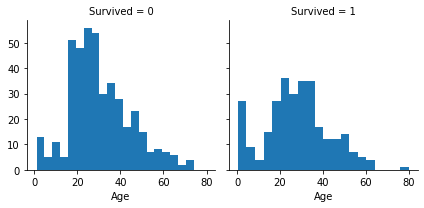

In [66]:
grafik1 = sns.FacetGrid(train_df, col="Survived")
grafik1.map(plt.hist, "Age" , bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


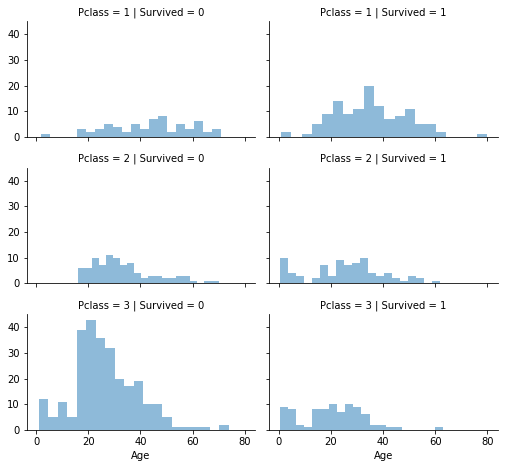

In [67]:
grafik2 = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grafik2.map(plt.hist, "Age", alpha=.5, bins=20)
grafik2.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


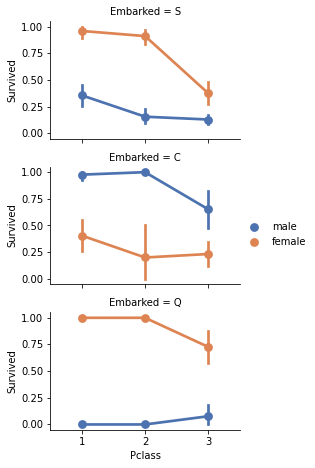

In [68]:
grafik3 = sns.FacetGrid(train_df, row="Embarked", size=2.2, aspect=1.6)
grafik3.map(sns.pointplot, "Pclass","Survived","Sex", palette="deep")
grafik3.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


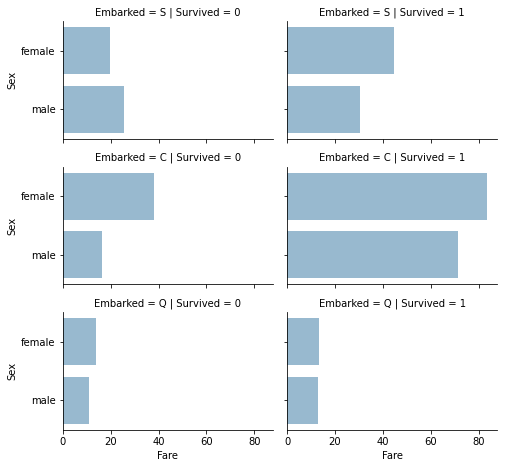

In [69]:
grafik4 = sns.FacetGrid(train_df, row="Embarked", col="Survived", size=2.2, aspect=1.6)
grafik4.map(sns.barplot, "Fare", "Sex", alpha=0.5, ci=None)
grafik4.add_legend()

In [70]:
print("veri setinin ilk hali: ", train_df.shape, test_df.shape)
train_df = train_df.drop(["Ticket","Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
print("veri setinin son hali: ", train_df.shape, test_df.shape)

veri setinin ilk hali:  (891, 12) (418, 11)
veri setinin son hali:  (891, 10) (418, 9)


In [71]:
all_data = [train_df, test_df]

In [72]:
for dataset in all_data:
  dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.",expand=False)

pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [73]:
for dataset in all_data:
  dataset["Title"] = dataset["Title"].replace(["Lady","Countess","Capt","Col",\
                                              "Don","Dr","Major","Rev","Sir", "Jonkheer"], "Rare") #rare encoder
  
  dataset["Title"] = dataset["Title"].replace("Mlle","Miss")
  dataset["Title"] = dataset["Title"].replace("Ms","Miss")
  dataset["Title"] = dataset["Title"].replace("Mme","Mrs")
train_df[["Title","Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [74]:
t_mapping = {"Miss":1, "Mr":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in all_data:
  dataset["Title"] = dataset["Title"].map(t_mapping)
  dataset["Title"] = dataset["Title"].fillna(0)

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [76]:
train_df = train_df.drop(["Name","PassengerId"], axis=1)
test_df = test_df.drop(["Name"], axis=1)
all_data = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [77]:
s_mapping = {"male": 0, "female" :1}
train_df["Sex"] = train_df["Sex"].map(s_mapping).astype(int)
test_df["Sex"] = test_df["Sex"].map(s_mapping).astype(int)

In [79]:
train_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [80]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,2
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,2


In [81]:
train_df.groupby(["Embarked"])[["Survived"]].count()

,Survived
Embarked,
C,168
Q,77
S,644


In [49]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Title         0
dtype: int64

In [86]:
train_df[train_df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [55]:
train_df.isnull().sum() * 100/train_df.shape[0]

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
Title        0.000000
dtype: float64

In [84]:
train_df.dropna(subset=["Embarked"], axis=0, inplace=True)

In [88]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,2
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,2


In [89]:
s_mapping = {"C": 0, "Q" :1,"S":2}
train_df["Embarked"] = train_df["Embarked"].map(s_mapping).astype(int)
test_df["Embarked"] = test_df["Embarked"].map(s_mapping).astype(int)

In [90]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,2
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,1
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,2


In [91]:
yas_tahmin = np.zeros((2,3))

In [92]:
yas_tahmin

array([[0., 0., 0.],
       [0., 0., 0.]])